In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from matplotlib.image import imread 
%matplotlib inline
import pandas as pd
import numpy as np
import cv

In [7]:
weight  = load_model('dense.h5')
weight1 = load_model('dense1.h5')
weight2 = load_model('dense2.h5')
weight4 = load_model('dense4.h5')


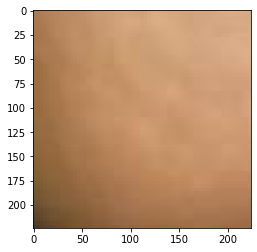

In [8]:
image = load_img('/home/fatmaosama/Desktop/GP/Ischaemia/normal/79_IMG_0259.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [12]:
result = weight4.predict(image)

result

array([[1., 0.]], dtype=float32)

In [13]:
test_data_generation = ImageDataGenerator(rescale=1./255)
testing_set = test_data_generation.flow_from_directory('/home/fatmaosama/Desktop/GP/Splitted/test',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)

Found 170 images belonging to 2 classes.


In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score

true_labels = np.concatenate([testing_set.next()[1] for i in range(testing_set.__len__())])
true_labels

array([1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

In [15]:
#prediction = weight.predict_classes(testing_set)
prediction=weight2.predict(testing_set)
classes_x=np.argmax(prediction,axis=1)
classes_x

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
cf = confusion_matrix(y_true= true_labels, y_pred= classes_x)
score = accuracy_score(y_true= true_labels, y_pred=classes_x)
print(cf)
print('the model performane is: ', score*100, "%")

[[  4 101]
 [  7  58]]
the model performane is:  36.470588235294116 %


In [17]:

true_labels4 = np.concatenate([testing_set.next()[1] for i in range(testing_set.__len__())])
true_labels4

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
prediction4=weight4.predict(testing_set)
classes_x4=np.argmax(prediction4,axis=1)
classes_x4

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [19]:
cf4 = confusion_matrix(y_true= true_labels4, y_pred= classes_x4)
score4 = accuracy_score(y_true= true_labels4, y_pred=classes_x4)
print(cf4)
print('the model performane is: ', score4*100, "%")

[[88 17]
 [ 5 60]]
the model performane is:  87.05882352941177 %


In [21]:
test_data_noised = ImageDataGenerator(rescale=1./255)
test_dataset_noised = test_data_noised.flow_from_directory('/home/fatmaosama/Desktop/GP/PartA_Splitted_Noised_Gauss/val',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)

Found 505 images belonging to 2 classes.


In [23]:
true_labels_noised = np.concatenate([test_dataset_noised.next()[1] for i in range(test_dataset_noised.__len__())])

prediction_noised=weight4.predict(test_dataset_noised)
classes_x_noised=np.argmax(prediction_noised,axis=1)
cf_noised = confusion_matrix(y_true= true_labels_noised, y_pred= classes_x_noised)
score_noised = accuracy_score(y_true= true_labels_noised, y_pred=classes_x_noised)
print(cf_noised)
print('the model performane is: ', score_noised*100, "%")

[[153 159]
 [ 19 174]]
the model performane is:  64.75247524752476 %


In [24]:
test_data_noised = ImageDataGenerator(rescale=1./255)
test_dataset_noised = test_data_noised.flow_from_directory('/home/fatmaosama/Desktop/GP/PartA_Splitted_Noised_poisson/val',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)

Found 505 images belonging to 2 classes.


In [25]:
true_labels_noised2 = np.concatenate([test_dataset_noised.next()[1] for i in range(test_dataset_noised.__len__())])

prediction_noised2=weight4.predict(test_dataset_noised)
classes_x_noised2=np.argmax(prediction_noised2,axis=1)
cf_noised2 = confusion_matrix(y_true= true_labels_noised2, y_pred= classes_x_noised2)
score_noised2 = accuracy_score(y_true= true_labels_noised2, y_pred=classes_x_noised2)
print(cf_noised2)
print('the model performane is: ', score_noised2*100, "%")

[[279  33]
 [ 38 155]]
the model performane is:  85.94059405940594 %


In [26]:
test_data_noised = ImageDataGenerator(rescale=1./255)
test_dataset_noised = test_data_noised.flow_from_directory('/home/fatmaosama/Desktop/GP/PartA_Splitted_Noised_s&p/val',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)

Found 505 images belonging to 2 classes.


In [29]:
true_labels_noised3 = np.concatenate([test_dataset_noised.next()[1] for i in range(test_dataset_noised.__len__())])
prediction_noised3=weight4.predict(test_dataset_noised)
classes_x_noised3=np.argmax(prediction_noised3,axis=1)
cf_noised3 = confusion_matrix(y_true= true_labels_noised3, y_pred= classes_x_noised3)
score_noised3 = accuracy_score(y_true= true_labels_noised3, y_pred=classes_x_noised3)
print(cf_noised3)
print('the model performane is: ', score_noised3*100, "%")

[[262  50]
 [ 86 107]]
the model performane is:  73.06930693069307 %
